In [1]:
import pandas as pd

from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_key = pd.read_excel('./data/250618_SCFA.xlsx', sheet_name='Merge_rel_F2')
# df_key.head()

In [3]:
genus_list = ['Bifidobacterium','Faecalibacterium','Lachnospiraceae','Lactococcus','Leuconostoc','Weissella']
x_features = genus_list
y_features = ['AA', 'PA', 'BA']

In [4]:
corr_matrix = pd.DataFrame(index=x_features, columns=y_features)
pval_matrix = pd.DataFrame(index=x_features, columns=y_features)

In [5]:
for x in x_features:
    for y in y_features:
        corr, pval = spearmanr(df_key[x], df_key[y])
        corr_matrix.loc[x, y] = corr
        pval_matrix.loc[x, y] = pval

# Convert to float
corr_matrix = corr_matrix.astype(float)
pval_matrix = pval_matrix.astype(float)


In [6]:
corr_matrix

,AA,PA,BA
Bifidobacterium,0.659930,0.326683,0.677179
Faecalibacterium,0.601614,0.591626,0.670492
Lachnospiraceae,0.423110,0.407893,0.512865
Lactococcus,0.417254,0.576616,0.551439
Leuconostoc,0.661891,0.724746,0.813452
Weissella,0.706788,0.739175,0.806041


In [7]:
pval_matrix

,AA,PA,BA
Bifidobacterium,0.000012,5.181703e-02,5.744230e-06
Faecalibacterium,0.000104,1.445698e-04,7.672677e-06
Lachnospiraceae,0.010138,1.353216e-02,1.382132e-03
Lactococcus,0.011347,2.324354e-04,4.904801e-04
Leuconostoc,0.000011,5.784793e-07,1.639627e-09
Weissella,0.000001,2.621196e-07,2.990934e-09


In [8]:
df = pval_matrix.copy()
for col in ['AA', 'PA', 'BA']:
    pvals = df[col].values
    _, qvals, _, _ = multipletests(pvals, method='fdr_bh')
    df[col] = qvals

print(df)

                        AA        PA            BA
Bifidobacterium   0.000024  0.051817  1.148846e-05
Faecalibacterium  0.000156  0.000289  1.150902e-05
Lachnospiraceae   0.011347  0.016239  1.382132e-03
Lactococcus       0.011347  0.000349  5.885762e-04
Leuconostoc       0.000024  0.000002  8.972802e-09
Weissella         0.000009  0.000002  8.972802e-09


In [9]:
significant_mask = pval_matrix < 0.05
significant_corrs = corr_matrix.where(significant_mask).dropna(how='all').dropna(axis=1, how='all')

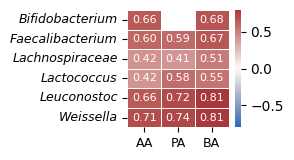

In [10]:
plt.figure(figsize=(2.9, 1.7))

# Draw the heatmap for significant correlations
sns.heatmap(significant_corrs, annot=True, cmap='vlag', center=0, fmt=".2f",
             linewidths=0.5, annot_kws = {'size' : 8}, vmax=0.8, vmin=-0.8)

# plt.title("Significant Spearman Correlation Heatmap (FDR < 0.05)")
plt.xticks(rotation=0, ha='center', fontsize=9)
plt.yticks(rotation=0, fontsize=9, fontstyle='italic')
plt.tight_layout()
plt.savefig('spearman_SCFA.png', dpi=600)
plt.show()

In [ ]:
# The SCFA intensities were normalized by setting the mean value of the control group to 1, allowing for relative comparison across groups.
df = pd.read_excel('./data/250618_SCFA.xlsx', sheet_name='Merge_rel_F2')
# df_key.head()

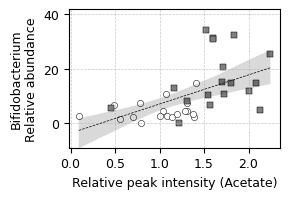

In [ ]:
g_colors = ['white','gray',]
group_order = ["Control", "Artichoke"]
marker_dict = {
    "Control": "o",
    "Artichoke": "s",
}

plt.figure(figsize=(3, 2.1))
for group, color in zip(group_order, g_colors):
    subset = df[df["Label"] == group]
    sns.scatterplot(
        data=subset,
        x="AA",
        y="Bifidobacterium",
        label=group,
        color=color,
        marker=marker_dict[group],
        s=20,
        edgecolor="black"
    )

sns.regplot(
data=df,
x="AA",
y="Bifidobacterium",
scatter=False,
color="black",
line_kws={"linewidth": 0.5, "label": "Overall trend", "linestyle": "--"}
)

# plt.title("Bifidobacterium vs Acetic acid by Group")
plt.xlabel("Relative peak intensity (Acetate)", fontsize=9)
plt.ylabel("Bifidobacterium\nRelative abundance",  fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylim([-9, 42])

plt.legend(title="Group", fontsize=9).remove()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # grid 추가

plt.tight_layout()
plt.savefig('corrleation_B_A.png', dpi=600)

plt.show()


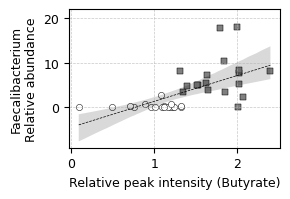

In [ ]:
g_colors = ['white','gray',]
group_order = ["Control", "Artichoke"]
marker_dict = {
    "Control": "o",
    "Artichoke": "s",
}

plt.figure(figsize=(3, 2.1))
for group, color in zip(group_order, g_colors):
    subset = df[df["Label"] == group]
    sns.scatterplot(
        data=subset,
        x="BA",
        y="Faecalibacterium",
        label=group,
        color=color,
        marker=marker_dict[group],
        s=20,
        edgecolor="black"
    )

sns.regplot(
data=df,
x="BA",
y="Faecalibacterium",
scatter=False,
color="black",
line_kws={"linewidth": 0.5, "label": "Overall trend", "linestyle": "--"}
)

# plt.title("Bifidobacterium vs Acetic acid by Group")
plt.xlabel("Relative peak intensity (Butyrate)", fontsize=9)
plt.ylabel("Faecalibacterium\nRelative abundance",  fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylim([-9, 22])
plt.legend(title="Group", fontsize=9).remove()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # grid 추가


plt.tight_layout()
plt.savefig('corrleation_F_B.png', dpi=600)

plt.show()
